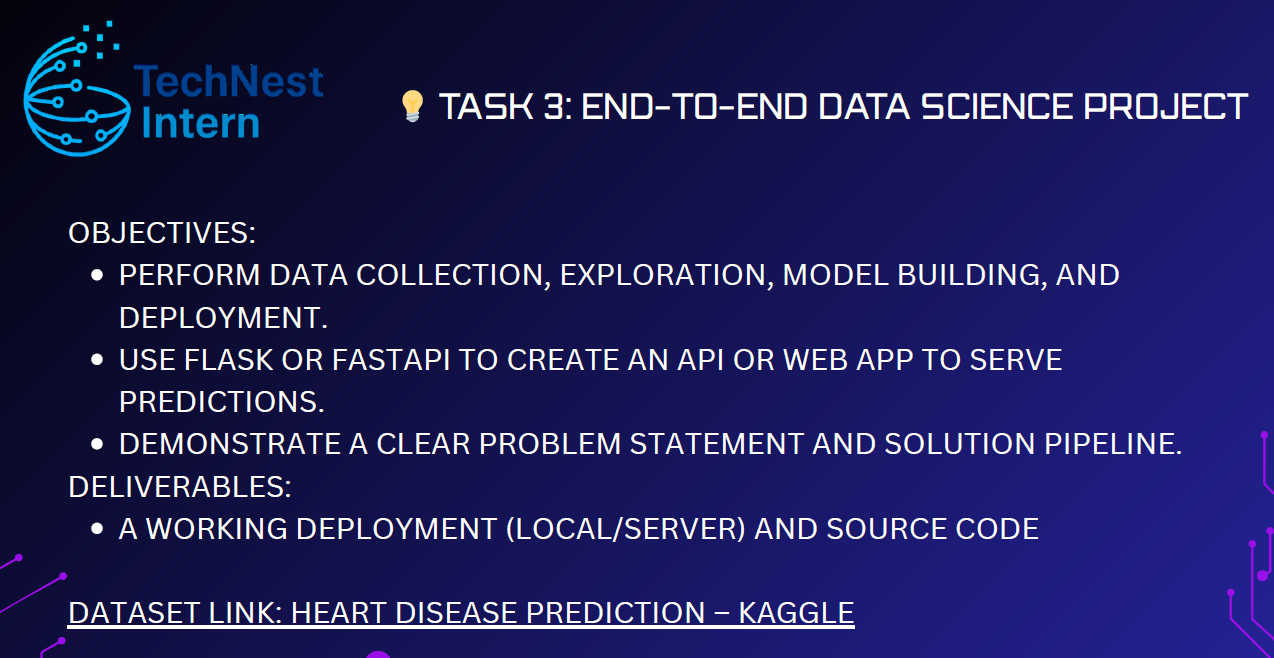

# Libraries Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,roc_auc_score,auc

In [2]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


In [3]:
data = pd.read_csv("heart.csv")

In [4]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
388,55,M,ASY,140,0,0,Normal,83,N,0.0,Flat,1
82,63,M,ASY,150,223,0,Normal,115,N,0.0,Flat,1
455,59,M,ASY,154,0,0,ST,131,Y,1.5,Up,0
560,54,M,NAP,133,203,0,ST,137,N,0.2,Up,0
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='Cholesterol', ylabel='MaxHR'>

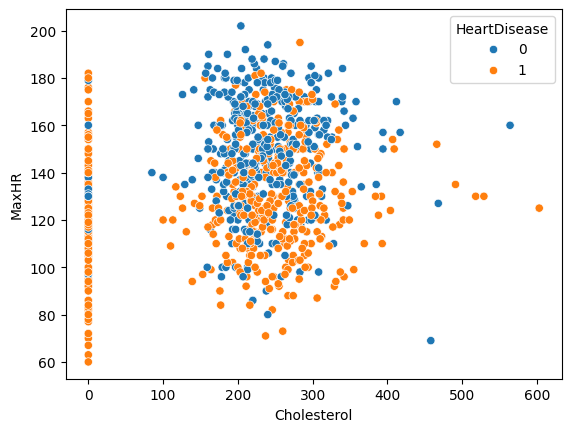

In [7]:
sns.scatterplot(data,x='Cholesterol',y='MaxHR', hue='HeartDisease')

<Axes: xlabel='MaxHR'>

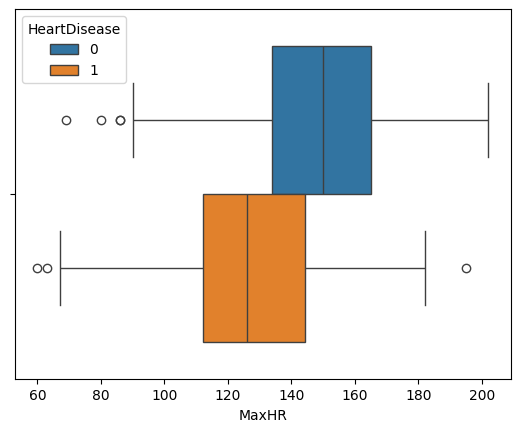

In [8]:
sns.boxplot(data,x='MaxHR', hue='HeartDisease')

<Axes: >

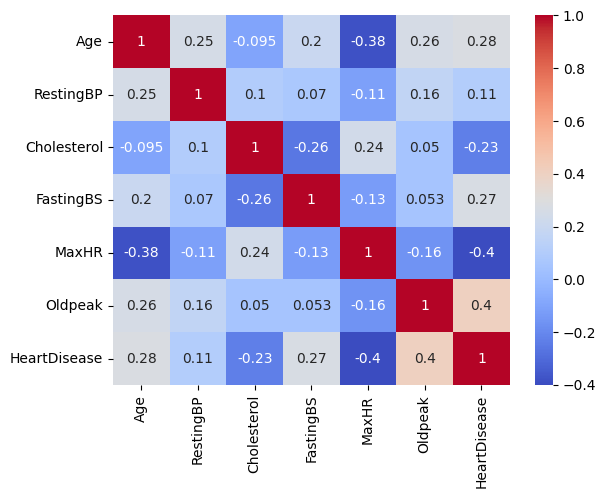

In [9]:
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm',annot=True)

# Encoding Categorical features

In [10]:
categorical_features = list(data.select_dtypes(include='object').columns)
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [11]:
import pickle

In [12]:
# For saving the LE and will be used later for transformation
LE_columns = {}
for col in categorical_features:
       LE = LabelEncoder()
       data[col] = LE.fit_transform(data[col])
       LE_columns[col] = LE

# Saving the intelligence of LE
with open('label_encoders.pkl','wb') as file:
    pickle.dump(LE_columns,file)

In [13]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
912,57,0,0,140,241,0,1,123,1,0.2,1,1
397,58,1,0,170,0,1,2,105,1,0.0,1,1
67,32,1,1,110,225,0,1,184,0,0.0,2,0
581,48,1,0,140,208,0,1,159,1,1.5,2,1
658,46,1,1,101,197,1,1,156,0,0.0,2,0


# Splitting into Features and Target

In [14]:
x = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

x.shape, y.shape

((918, 11), (918,))

# Splitting Data into Training and Testing Set

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)

print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of y_traiin : {y_train.shape}")
print(f"Shape of x_test : {x_test.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of x_train : (734, 11)
Shape of y_traiin : (734,)
Shape of x_test : (184, 11)
Shape of y_test : (184,)


# **MODEL BUILDING**

In [16]:
LR = LogisticRegression()
model_01 = LR.fit(x_train,y_train)
pred_01 = model_01.predict(x_test)

# Accuracy Score
accuracy_01 = accuracy_score(y_test, pred_01)
print(f"Accuracy 01 : {accuracy_01}\n\n")

Accuracy 01 : 0.8695652173913043




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
RF = RandomForestClassifier(n_estimators=150,random_state=42)
model_02 = RF.fit(x_train,y_train)
pred_02 = model_02.predict(x_test)

# Accuracy Score
accuracy_02 = accuracy_score(y_test, pred_02)
print(f"Accuracy 02 : {accuracy_02}\n\n")

Accuracy 02 : 0.8913043478260869




# **MODEL EVALUATION**

# ROC CURVE AND AUC

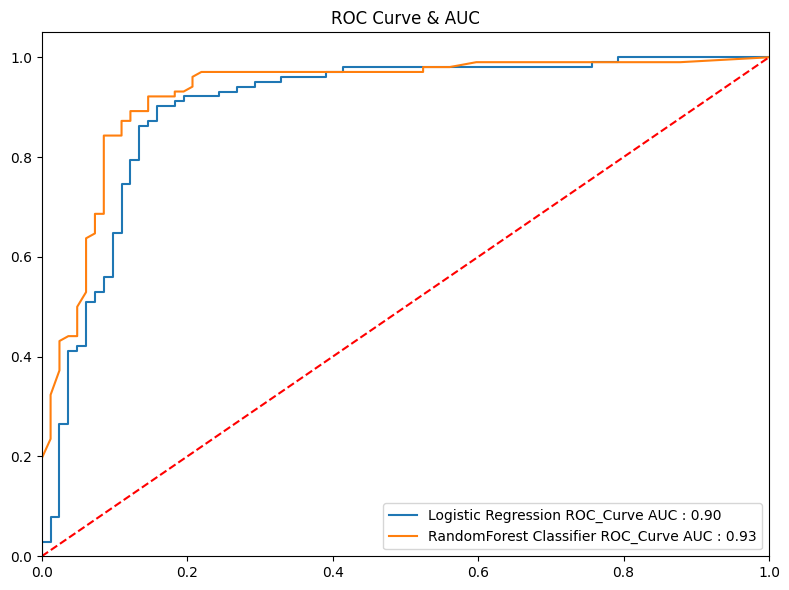

In [18]:
# probability values of class 1
pred_prob_01 = model_01.predict_proba(x_test)[:,1]
pred_prob_02 = model_02.predict_proba(x_test)[:,1]

# for model_01  Logistics Regression
fpr1, tpr1, threshold1 = roc_curve(y_test,pred_prob_01)
auc1 = auc(fpr1,tpr1)

# for model_02 RandomForestClassifier
fpr2, tpr2, threshold2 = roc_curve(y_test, pred_prob_02)
auc2 = auc(fpr2, tpr2)

# Visulization of ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, label = f"Logistic Regression ROC_Curve AUC : {auc1:.2f}")
plt.plot(fpr2, tpr2, label = f"RandomForest Classifier ROC_Curve AUC : {auc2:.2f}")
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title(f"ROC Curve & AUC")
plt.legend()
plt.tight_layout()
plt.show()

# CONFUSION MATRIX

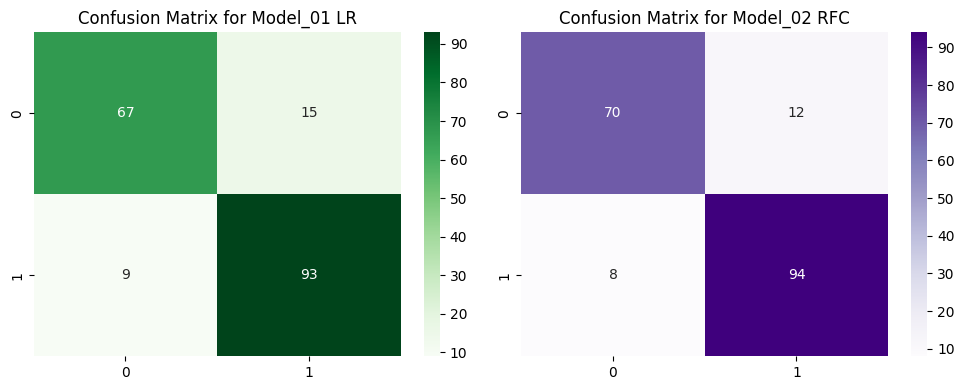

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,pred_01), cmap='Greens', annot=True)
plt.title("Confusion Matrix for Model_01 LR")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,pred_02), cmap='Purples', annot=True)
plt.title("Confusion Matrix for Model_02 RFC")
plt.tight_layout()
plt.show()

# Hyperparamter Tuning

In [20]:
params = {
    'n_estimators' : [100,150,180,200,300,500],
    'criterion' : ['gini','entropy'],
    'min_samples_split' : [2,5,7,10],
    'min_samples_leaf' : [2,3,4,5,7],
}

In [21]:
# building on RandomForestClassifier estimator
RFC = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator = RFC, param_distributions=params)
random_search.fit(x_train,y_train)
# Defining best estimator as best model
best_model = random_search.best_estimator_

In [22]:
# Best Model Evaluation
y_pred = best_model.predict(x_test)

best_accuracy = accuracy_score(y_test,y_pred)
print(f" Accuracy of Best_Model : {best_accuracy:.4f}")

 Accuracy of Best_Model : 0.8804


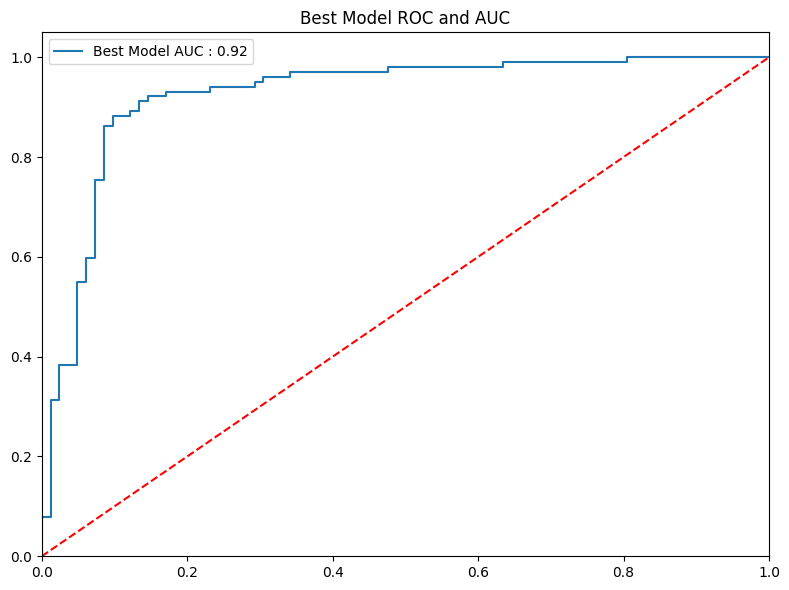

In [23]:
# probability of x_test by best model
y_pred_proba = best_model.predict_proba(x_test)[:,1]
# AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
AUC = auc(fpr,tpr)
# Visualization of ROC and AUC of best model
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = f"Best Model AUC : {AUC:.2f}")
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title(f"Best Model ROC and AUC")
plt.legend()
plt.tight_layout()
plt.show()

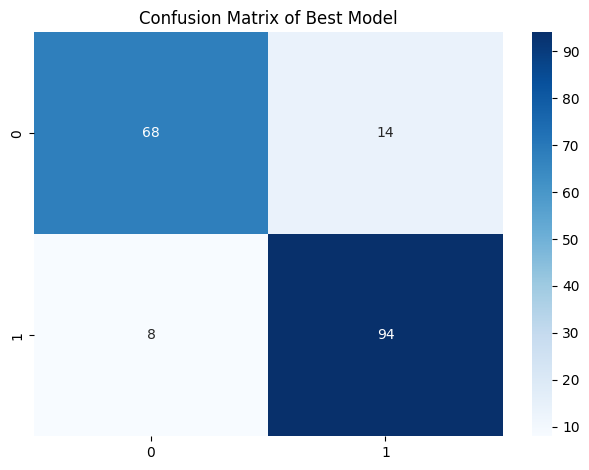

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Blues', annot=True)
plt.title("Confusion Matrix of Best Model")
plt.tight_layout()
plt.show()

# Saving model

In [25]:
import pickle

with open('best_model.pkl','wb') as file:
  pickle.dump(best_model,file)

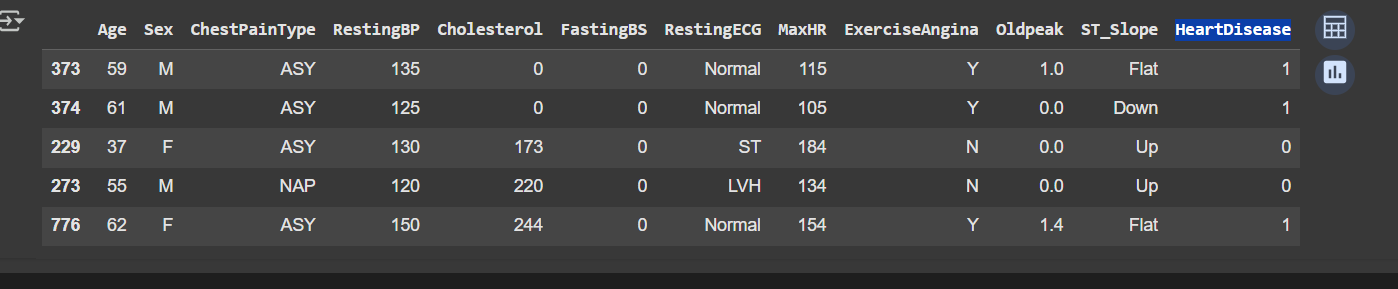

# Loading the Model and predicting to check the model is functioning

In [28]:
ints = [61,'M','NAP',185,112,0,'ST',109,'Y',0.2,'Up']
features = list(x_train.columns)
dicting = dict(zip(features,ints))
dataframe = pd.DataFrame(dicting, index=[1])

with open('best_model.pkl','rb') as file:
  model = pickle.load(file)

dataframe_cat = list(dataframe.select_dtypes(include='object').columns)

with open('label_encoders.pkl','rb') as file:
  encoder = pickle.load(file)

for col in dataframe_cat:
  dataframe[col] = encoder[col].transform(dataframe[col])

preds = model.predict(dataframe)
preds

array([0])